In [2]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.decomposition import PCA
import joblib


In [3]:
# Import des données
df = pd.read_csv("billets.csv", sep = ";")
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# On regarde les dimmension du Dataframe
print(df.shape)

(1500, 7)


In [5]:
# On regarde le type de nos données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
# Répartition des dimension de l'ensemble des billets
round(df.describe(), 2)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1463.00,1500.00,1500.00
mean,171.96,104.03,103.92,4.49,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.01,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


In [7]:
# On regarde le nombre de vrai et de faux billet au sein de notre dataframe
print("Vrai billet : ",df.loc[df['is_genuine'] == True]["is_genuine"].count())
print("Faux billet : ",df.loc[df['is_genuine'] == False]["is_genuine"].count())

Vrai billet :  1000
Faux billet :  500


# Nettoyage des données

In [8]:
# Création d'un Dataframe avec uniquement les vrai billets
df_vrai_billet = df[df['is_genuine'] == True]
df_vrai_billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
# Répartition des dimension des vrais billets
round(df_vrai_billet.describe(), 2)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.00,1000.00,1000.00,971.00,1000.00,1000.00
mean,171.99,103.95,103.81,4.12,3.05,113.20
std,0.30,0.30,0.29,0.32,0.19,0.36
min,171.04,103.14,102.82,2.98,2.27,111.76
25%,171.79,103.74,103.61,3.90,2.93,112.95
50%,171.99,103.95,103.81,4.11,3.05,113.20
75%,172.20,104.14,104.00,4.34,3.18,113.46
max,172.92,104.86,104.95,5.04,3.74,114.44


In [10]:
# Création d'un Dataframe avec les faux billet uniquement
df_faux_billet = df[df['is_genuine'] == False]
df_faux_billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72


In [11]:
# Répartition des dimension des faux billets
round(df_faux_billet.describe(), 2)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.00,500.00,500.00,492.00,500.00,500.00
mean,171.90,104.19,104.14,5.22,3.35,111.63
std,0.31,0.22,0.27,0.55,0.18,0.62
min,171.04,103.51,103.43,3.82,2.92,109.49
25%,171.69,104.04,103.95,4.84,3.22,111.20
50%,171.91,104.18,104.16,5.19,3.35,111.63
75%,172.09,104.33,104.32,5.59,3.47,112.03
max,173.01,104.88,104.95,6.90,3.91,113.85


Suite au deux descriptions des dataframe df_vrai_billet et df_faux_billet on peux constater des differences entre les dimensions des vrai et des faux billets. Nous allons par la suite voir plus en détaille comment ce matérailise ces différences.

## Analyse exploratoire

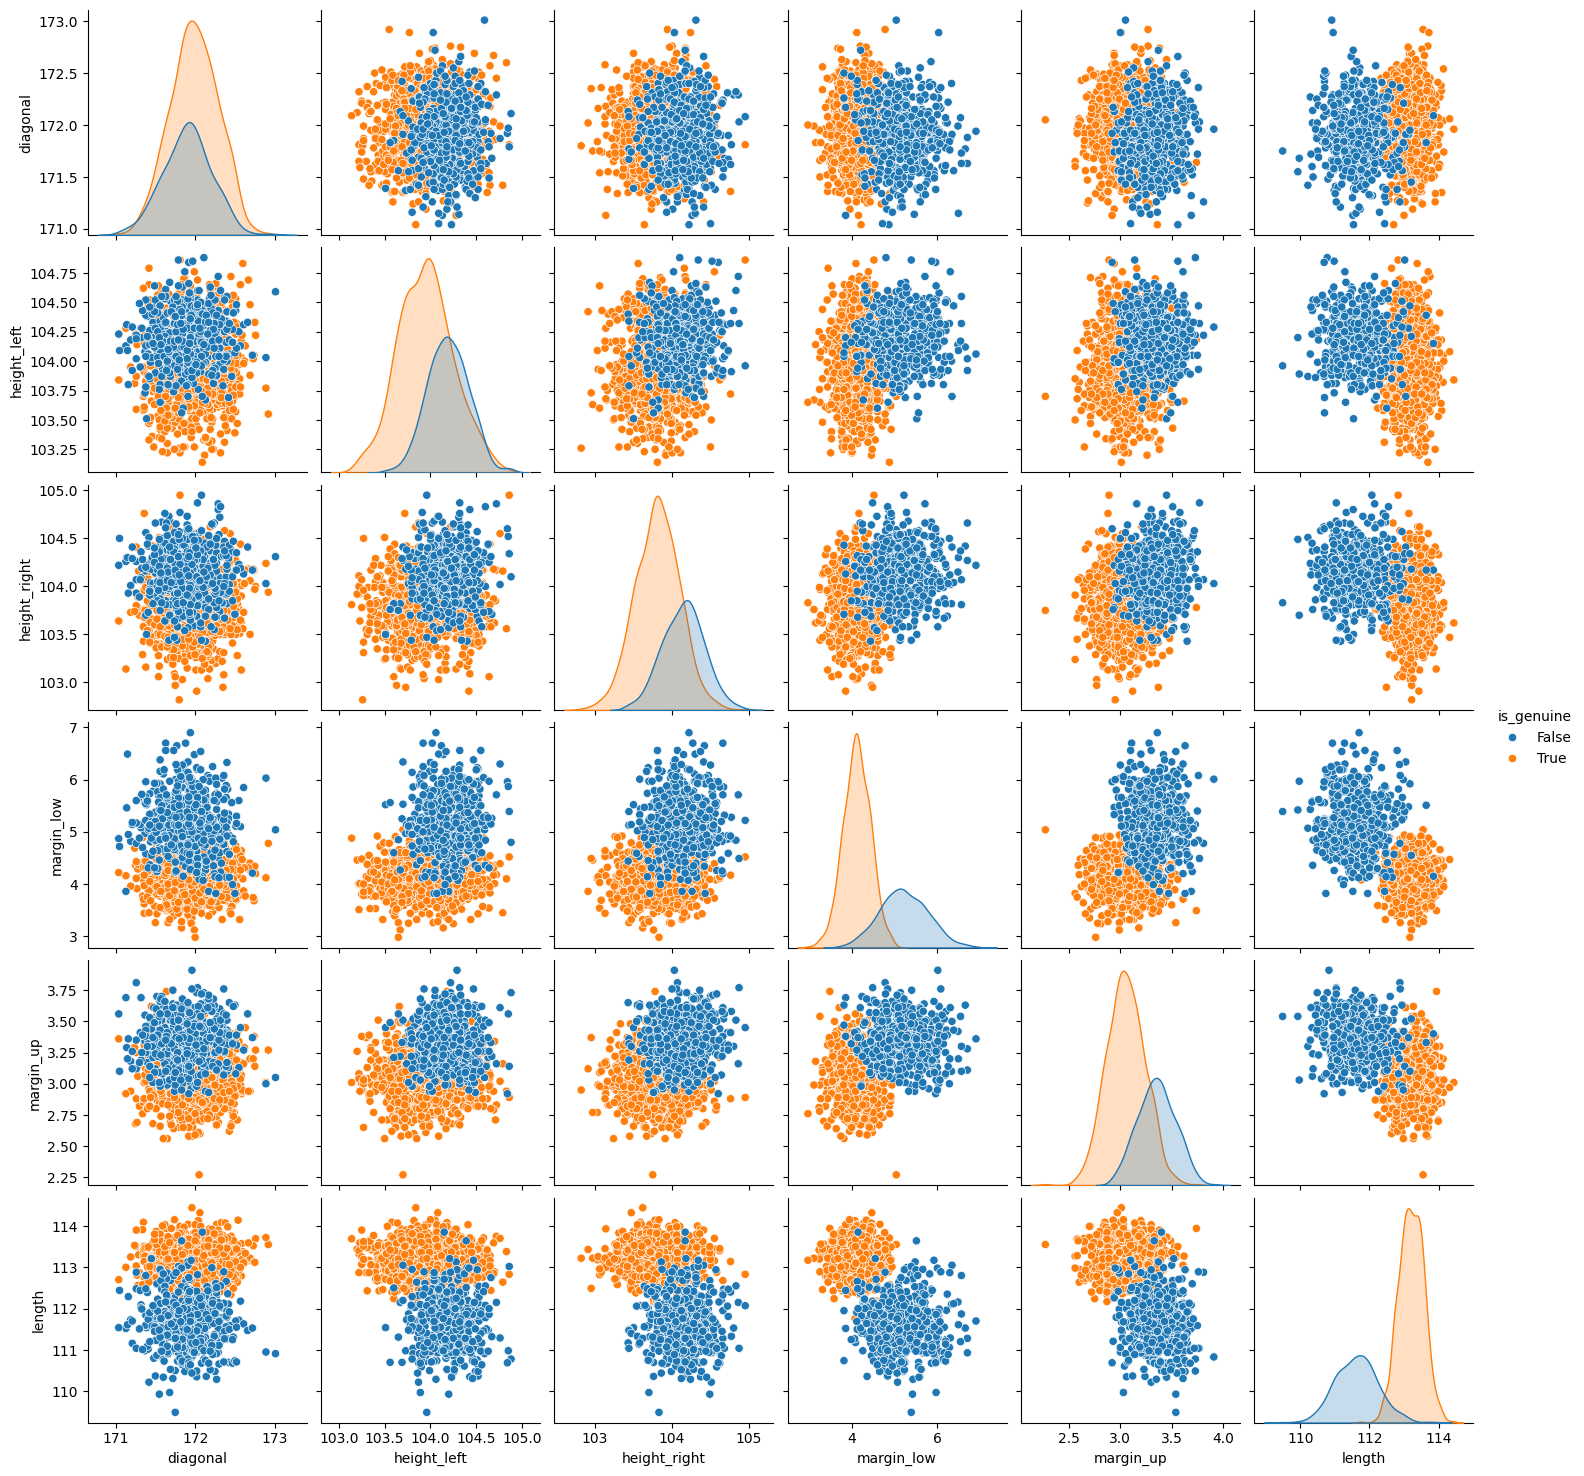

In [12]:
sns.pairplot(df, hue="is_genuine")

L'analyse du pairplot met en évidence plusieurs éléments permettant de différencier les vrais billets des contrefaçons :

La variable length montre une séparation marquée entre les deux types : les billets authentiques présentent une longueur légèrement supérieure, autour de 113 mm, contre environ 112 mm pour les faux.

Pour la variable margin_low, la tendance s’inverse : les billets contrefaits affichent généralement une marge basse plus élevée (environ 6 mm), tandis que les billets authentiques restent autour de 4 mm.

Le graphique croisant length et margin_low révèle une bonne distinction entre les deux catégories, avec des zones de dispersion relativement bien délimitées.

En résumé, trois variables ressortent comme particulièrement discriminantes pour identifier la nature des billets : length, margin_low et margin_up.

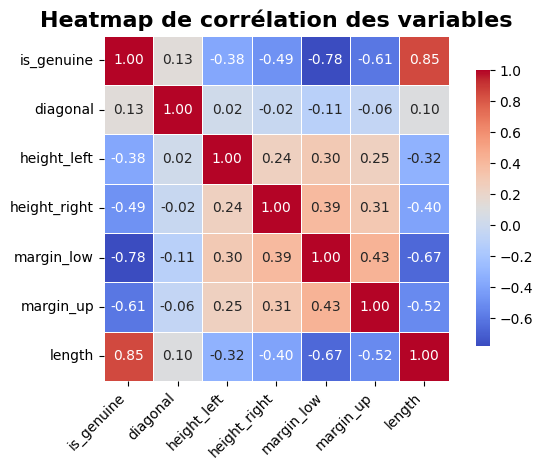

In [13]:
# Création de la heatmap

sns.heatmap(
     df.corr(),
    annot=True,        # Affiche les coefficients
    fmt=".2f",         # Format des nombres
    cmap="coolwarm",   # Palette de couleurs
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Heatmap de corrélation des variables", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Certaines variables présentent des corrélations significatives :

On observe une forte corrélation positive entre length et la variable is_genuine, avec un coefficient avoisinant 0,85, ce qui suggère que les billets authentiques tendent à être plus longs.

À l’inverse, margin_low affiche une corrélation négative marquée avec is_genuine (environ -0,78), indiquant que les faux billets ont généralement une marge basse plus importante.

Il existe également une corrélation notable entre margin_low et length, avec un coefficient de -0,67, révélant une relation inverse entre ces deux dimensions.

Par ailleurs, margin_up est aussi liée à is_genuine, avec un coefficient négatif autour de -0,61, et montre une certaine dépendance vis-à-vis de length, bien que plus modérée, avec un coefficient de -0,52.

Ces relations suggèrent que certaines variables pourraient jouer un rôle clé dans la détection des faux billets.

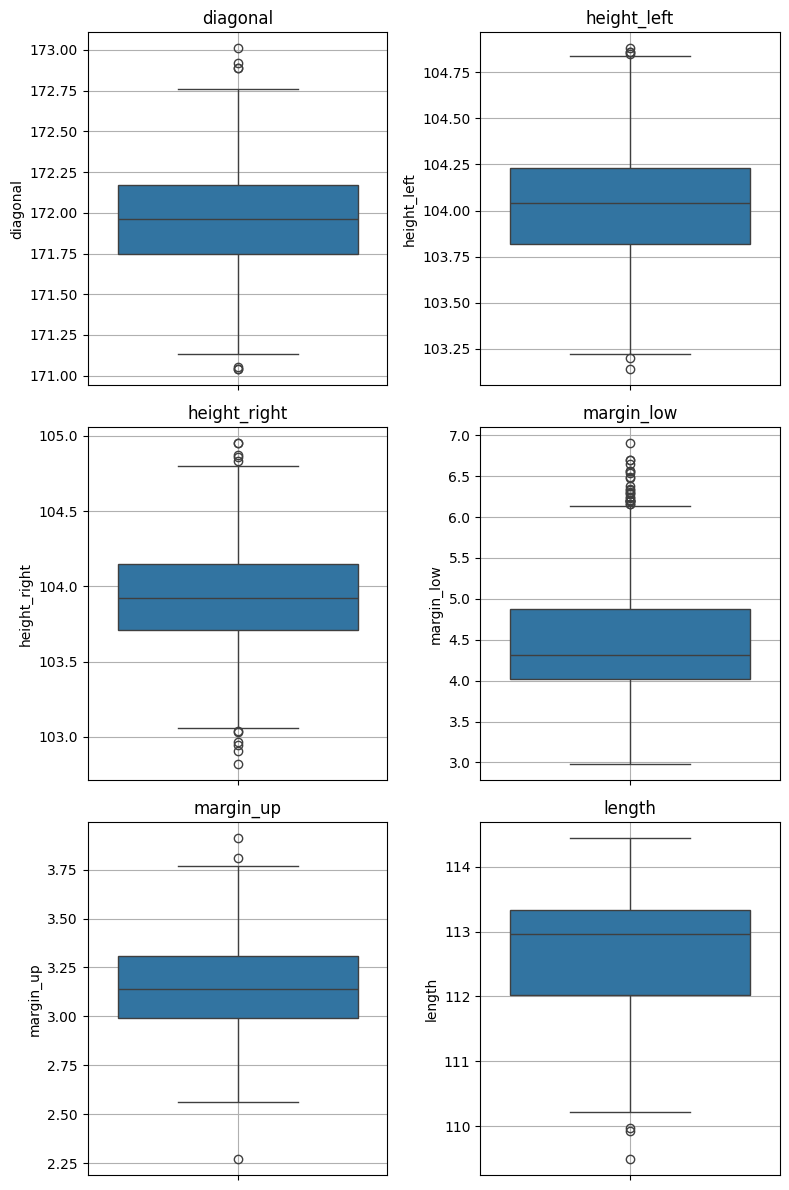

In [14]:
import math
# Liste des variables numériques sauf 'is_genuine'
variables_numeriques = [col for col in df.select_dtypes(include='number').columns if col != 'is_genuine']

# Paramètres de la grille
n_vars = len(variables_numeriques)
n_cols = 2
n_rows = math.ceil(n_vars / n_cols)

# Taille de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 4))
axes = axes.flatten()  # Pour un accès indexé simple

# Boucle sur les variables
for i, var in enumerate(variables_numeriques):
    sns.boxplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(var)
    axes[i].grid(True)

# Supprimer les sous-graphiques inutilisés si n'est pas pair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

La plupart des variables sont plutôt bien centrées autour de leurs médianes, avec une dispersion modérée.
De nombreux outliers sont présents, notamment pour margin_low, ce qui peut indiquer des cas particuliers ou des erreurs de saisie.
La forme symétrique ou non des boîtes donne une idée de la symétrie de la distribution (si la médiane n’est pas au centre, la distribution est asymétrique).

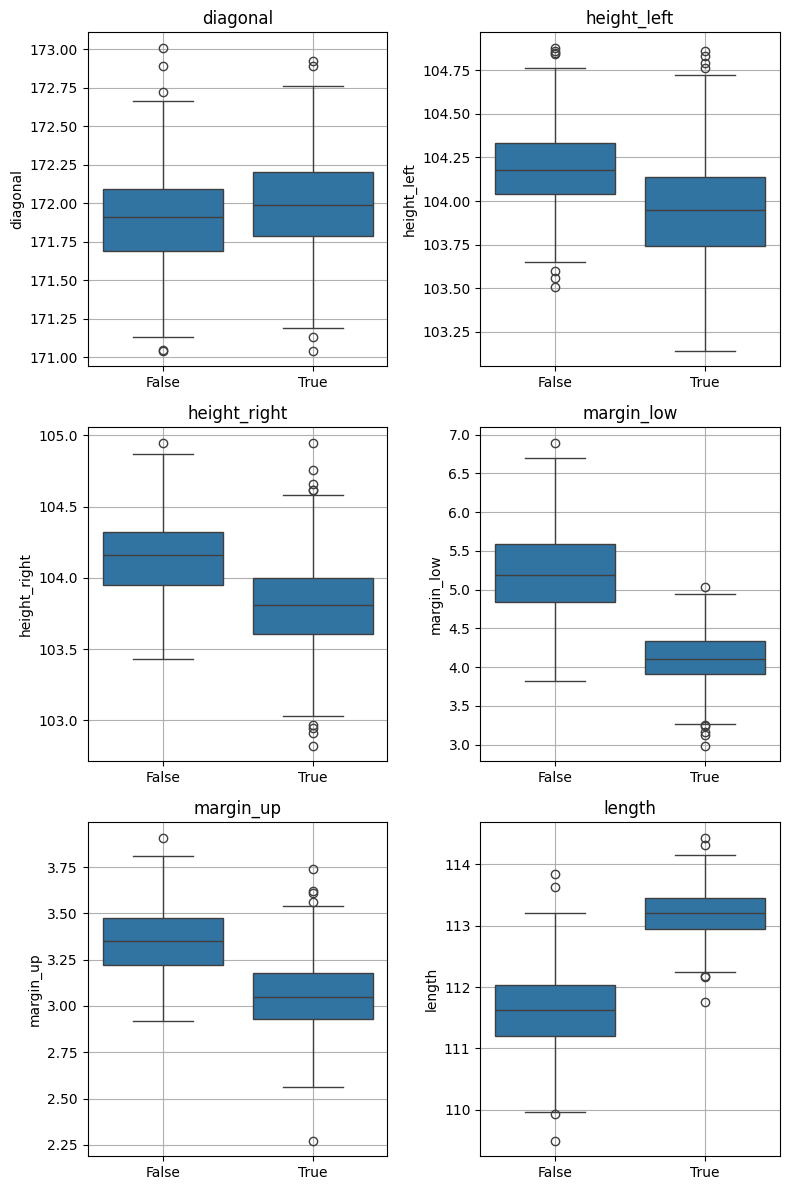

In [15]:
import math
# Liste des variables numériques sauf 'is_genuine'
variables_numeriques = [col for col in df.select_dtypes(include='number').columns if col != 'is_genuine']

# Paramètres de la grille
n_vars = len(variables_numeriques)
n_cols = 2
n_rows = math.ceil(n_vars / n_cols)

# Taille de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 4))
axes = axes.flatten()  # Pour un accès indexé simple

# Boucle sur les variables
for i, var in enumerate(variables_numeriques):
    sns.boxplot(data=df, x="is_genuine", y=var, ax=axes[i])
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(var)
    axes[i].grid(True)

# Supprimer les sous-graphiques inutilisés si n'est pas pair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Les groupes False et True montrent des différences notables pour certaines variables, notamment length et margin_low.
Pour les variables de hauteur et de marge, le groupe False a des valeurs globalement un peu plus élevées, tandis que le groupe True se distingue par une longueur supérieure et des marges plus faibles.

# Régression linéaire

In [16]:
# On créer un dataframe avec les valeurs manquantes et un sans valeurs manquante
df_non_vide = df.dropna()
df_vide = df.loc[df['margin_low'].isna()]

## Régression linéaire multiple

In [17]:
billetsNonVide = df_non_vide.copy()
X = billetsNonVide[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']] # dataframe des régresseurs

# Régression linéaire multiple
regLinMul = LinearRegression().fit(X, billetsNonVide['margin_low'])

# R²
R2mul = regLinMul.score(X, billetsNonVide['margin_low'])

print('R² = {}\nCoefficient constant : {}\nCoefficients : {}'.format(R2mul, regLinMul.intercept_, regLinMul.coef_))

R² = 0.4773366973063956
Coefficient constant : 22.9948427144479
Coefficients : [-0.11105978  0.18412242  0.25713805  0.2561879  -0.40910293]


Ce modèle explique environ 47 % de la variance de la variable cible, avec deux variables indépendantes ayant des effets positifs et négatifs respectivement. La constante est proche de zéro, ce qui indique que sans influence des variables, la valeur prédite est très proche de zéro.

## Régression linéaire simple

In [18]:
# Regression linéaire simple et R²
regLin = LinearRegression().fit(billetsNonVide[['length']], billetsNonVide['margin_low'])
R2 = regLin.score(billetsNonVide[['length']], billetsNonVide['margin_low'])

print('R² = {}\nCoefficient constant : {}\nCoefficient : {}'.format(R2, regLin.intercept_, regLin.coef_))

R² = 0.44455927082934943
Coefficient constant : 61.5960086247053
Coefficient : [-0.50685746]


Ce modèle explique environ 44 % de la variance de la variable cible, avec une seule variable indépendante ayant un effet négatif significatif. La constante est proche de zéro, ce qui indique que sans influence de la variable indépendante, la valeur prédite est proche de zéro.

La régression linéaire simple a un coefficient de détermination proche de celui de la régression linéaire multiple. Ce modèle nécessitant moins de variables est plus robuste et sera privilégié.

# Normalité des résidus

In [19]:
import statsmodels.api as sm

X = sm.add_constant(billetsNonVide[['length']])
y = billetsNonVide['margin_low']

resultat = sm.OLS(y, X).fit()
residuals = resultat.resid

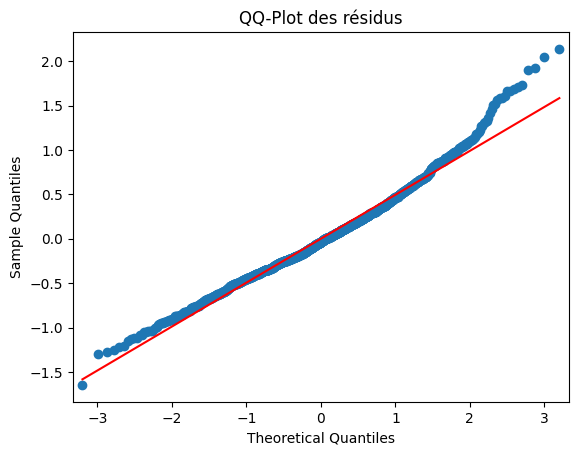

In [20]:
# QQ-Plot des résidus
sm.qqplot(residuals, line='s')
plt.title("QQ-Plot des résidus")
plt.show()

Le jeu de données semble suivre une distribution normale de manière raisonnable, avec quelques petites déviations aux extrémités.

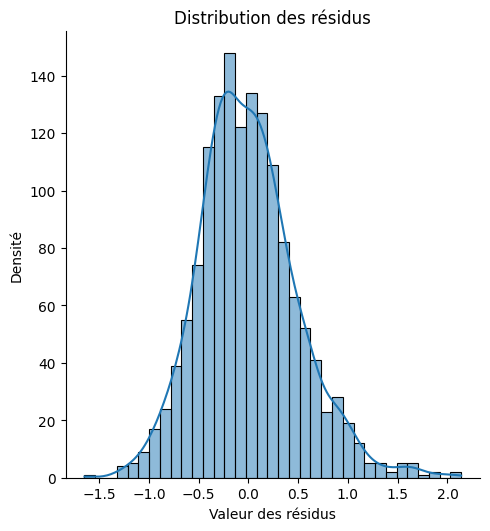

In [21]:
#Distribution des résidus
sns.displot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Valeur des résidus")
plt.ylabel("Densité")
plt.show()

La distribution des résidus semble suivre une distribution normale, ce qui est un bon signe pour la validité de votre modèle de régression.

In [22]:
#Test de Shapiro Wilk
residuals = resultat.resid
stat, p = shapiro(residuals)
print(f"Statistique={stat}, p-value={p}")

if p > 0.05:
    print("Les résidus suivent une loi normale.")
else:
    print("Les résidus ne suivent pas une loi normale.")

Statistique=0.9824796531420281, p-value=2.3942672551424426e-12
Les résidus ne suivent pas une loi normale.


# Homoscédasticité des résidus

In [23]:
from scipy.stats import levene
# Test de Levene (homoscédasticité)
# On récupère les résidus
residuals = resultat.resid
# On récupère la variable prédite
predicted = resultat.fittedvalues
groups = pd.qcut(predicted, q=5, labels=False)
levene_test = levene(*[residuals[groups == i] for i in np.unique(groups)], center='mean')
print("Test de Levene:")
print(f"Statistique de test : {levene_test.statistic:.4f}")
print(f"Valeur p : {levene_test.pvalue:.4e}")
if levene_test.pvalue > 0.05:
    print("Homogénéité des variances (homoscédasticité) respectée.")
else:
    print("Variance inégale entre les groupes (hétéroscédasticité).")

Test de Levene:
Statistique de test : 40.0681
Valeur p : 6.9997e-32
Variance inégale entre les groupes (hétéroscédasticité).


La p-value très faible (inférieure à 0.05) indique que la différence de variance entre les groupes est statistiquement significative.
En d'autres termes, les variances ne sont pas égales (il y a une hétéroscédasticité).

# Multicolinéarité

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sélection et conversion explicite en float
df_vif = df_non_vide[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].astype(float)

# Ajout d'une constante pour l'interception
X = add_constant(df_vif)

# Calcul du VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable            VIF
0         const  592495.682281
1      diagonal       1.018610
2   height_left       1.151474
3  height_right       1.260286
4    margin_low       1.913278
5     margin_up       1.419672
6        length       2.131067


Aucune variable ne présente de colinéarité problématique au sein du modèle.

# Application de la régression linéaire simple

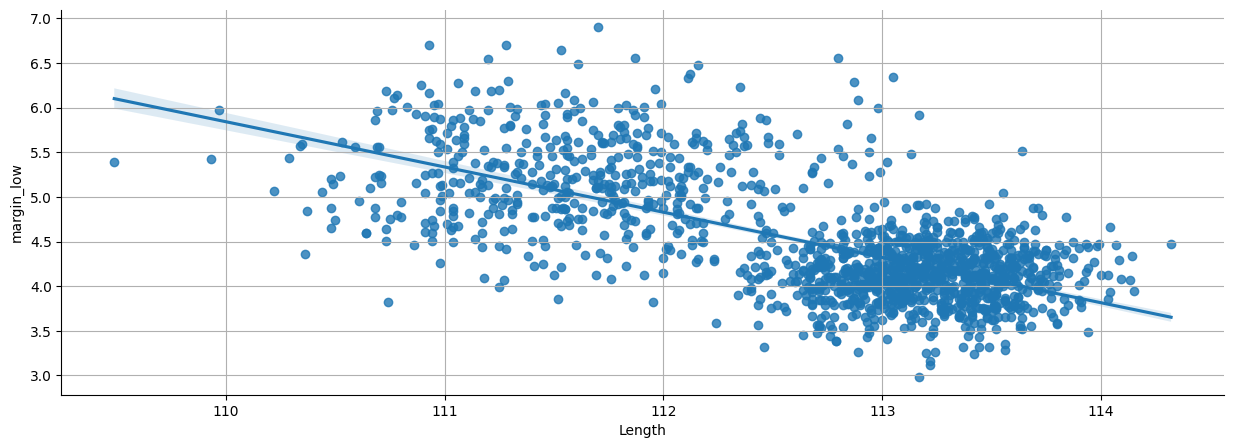

In [25]:
fig, ax = plt.subplots(figsize = (15,5))
sns.regplot(x = df['length'], y = df['margin_low'])
plt.ylabel('margin_low')
plt.xlabel('Length')
plt.title('')
plt.grid()
sns.despine()

In [26]:
#Création du modèle de régression linéaire
reg = LinearRegression()

In [27]:
#Définition des variables
X = df_non_vide[['length']]
y = df_non_vide['margin_low']
#Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
#Entraînement du modèle
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
#Prédiction sur l'ensemble test
y_pred_test = reg.predict(X_test)

In [30]:
#Prédiction pour les valeurs manquantes
X_missing = df_vide[['length']]
y_pred_missing = reg.predict(X_missing)

In [31]:
#Imputation des valeurs manquantes
df.loc[df['margin_low'].isnull(), 'margin_low'] = y_pred_missing

In [32]:
#Vérification des valeurs manquantes
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Methode de régression logistique classique

In [33]:
# Séléection des données numérique uniquement
X_cols = [col for col in df.select_dtypes(include='number').columns if col != 'is_genuine']
X = df[X_cols]
y = df['is_genuine']

In [34]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
# On concatène X et y pour retrouver 'is_genuine'
X_scaled["is_genuine"] = y

In [35]:
X_scaled.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,-0.486540,2.774123,3.163240,0.054552,-1.128325,0.173651,True
1,-1.633729,-2.236535,-0.799668,-1.083959,-0.696799,0.471666,True
2,2.397823,1.504756,-1.291191,-0.127610,-0.912562,0.551901,True
3,-1.961498,-0.399294,0.060498,-1.311661,-0.610494,0.953075,True
4,-0.748754,0.836669,-1.414072,-0.674095,1.417677,-0.158750,True


In [36]:
X = X_scaled[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = X_scaled["is_genuine"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=808)

In [38]:
clf = LogisticRegression(random_state=808).fit(X_train, y_train)

In [39]:
# Prediction d'un échantillon
sample_8 = X.iloc[[8]]
print("Prédiction :", clf.predict(sample_8)[0])
print("Probabilité :", clf.predict_proba(sample_8)[0][1])

Prédiction : True
Probabilité : 0.9926841036294033


In [40]:
# Prediction d'un échantillon
sample_13= X.iloc[[13]]
print("Prédiction", clf.predict(sample_13)[0])
print("Probabilité", clf.predict_proba(sample_13)[0][1])

Prédiction True
Probabilité 0.9901960838295377


In [41]:
#Prédiction
y_pred = clf.predict(X_test)
print("accuracy", round(accuracy_score(y_test, y_pred), 3))

accuracy 0.997


In [42]:
#Matrice de confusion
print(confusion_matrix(y_test, y_pred))

[[110   1]
 [  0 189]]


Interprétation
Modèle très performant :
Il n’a fait qu’une seule erreur sur la classe 0 (faux positifs), et aucune erreur sur la classe 1.
Aucune observation de la classe 1 n’a été classée à tort en classe 0.
Précision globale élevée : la grande majorité des prédictions sont correctes.

In [43]:
#On enregistre le model
joblib.dump((scaler, clf), 'model_RL.pkl')

['model_RL.pkl']

# Kmeans

In [44]:
# 1. Données et standardisation
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
df_kmeans = X_scaled.copy()
scaler = StandardScaler()
df_kmeans[features] = df_kmeans[features]

In [45]:
X = df_kmeans[features].values
y = df_kmeans["is_genuine"].values  # Vrais/faux billets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, stratify=y, random_state=0
)


Nombre de clusters : 2
Silhouette Score : 0.3425

Nombre de clusters : 3
Silhouette Score : 0.2103

Nombre de clusters : 4
Silhouette Score : 0.1960

Nombre de clusters : 5
Silhouette Score : 0.1562

Nombre de clusters : 6
Silhouette Score : 0.1486

Nombre de clusters : 7
Silhouette Score : 0.1451


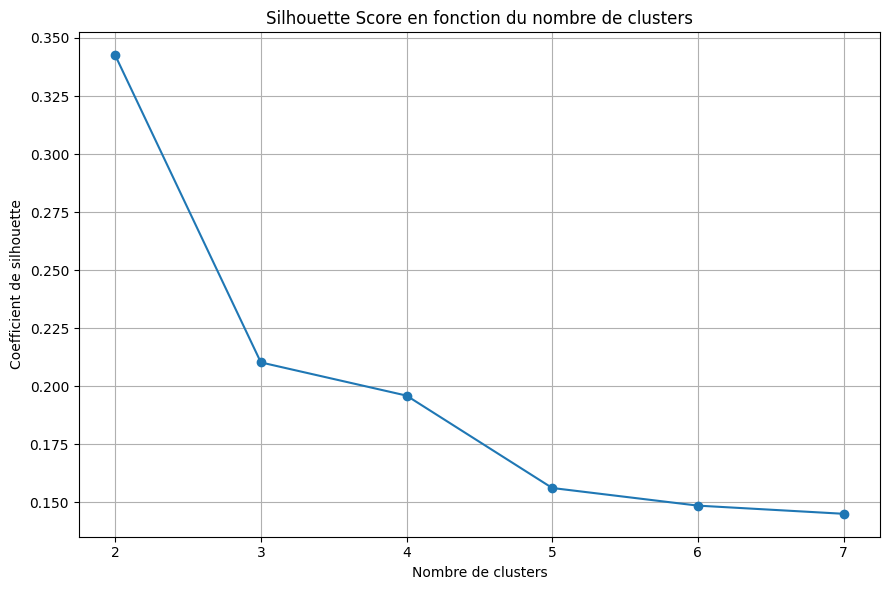

In [47]:
# Supposons que tu as déjà :
# X_scaled = ... (tes données normalisées ou standardisées)

# 3. Choix optimal du nombre de clusters
silhouette_scores = []

range_k = range(2, 8)
for n_clusters in range_k:
    print(f"\nNombre de clusters : {n_clusters}")
    kmeans_tmp = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42, n_init=10)
    labels_tmp = kmeans_tmp.fit_predict(X)
    score = silhouette_score(X, labels_tmp)
    print(f"Silhouette Score : {score:.4f}")
    silhouette_scores.append(score)

# Visualisation du score de silhouette
plt.figure(figsize=(9, 6))
plt.plot(range_k, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid(True)
plt.tight_layout()
plt.show()

Le modèle de clustering avec 2 clusters est celui qui offre la meilleure séparation et cohésion des groupes parmi les options testées.

In [48]:
# 4. Re-clustering avec le meilleur k
best_k = range_k[np.argmax(silhouette_scores)]
print(f"\nNombre optimal de clusters (selon Silhouette) : {best_k}")
kmeans = KMeans(n_clusters=best_k, init="k-means++", random_state=808, n_init=10)
kmeans.fit(X)


Nombre optimal de clusters (selon Silhouette) : 2


KMeans(n_clusters=2, n_init=10, random_state=808)

In [49]:
# 5. Réduction de dimension (PCA 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans.cluster_centers_)

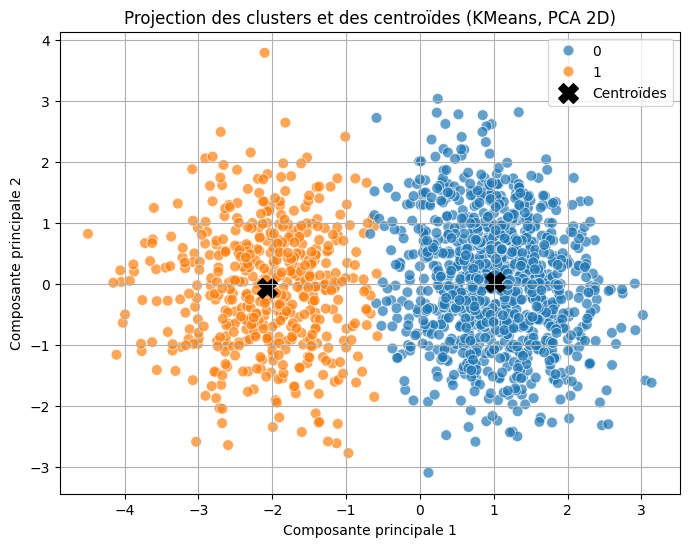

In [50]:
# 6. Visualisation
clusters_full = kmeans.predict(X)

df_clusters_full = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Cluster": clusters_full
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clusters_full, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=60, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c="black", marker="X", label="Centroïdes")
plt.title("Projection des clusters et des centroïdes (KMeans, PCA 2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# 10. Évaluation sur X_test uniquement
labels_test = kmeans.predict(X_test)

acc1 = accuracy_score(y_test, labels_test)
acc2 = accuracy_score(y_test, 1 - labels_test)

if acc2 > acc1:
    labels_test = 1 - labels_test
    print("Inversion des labels pour alignement optimal")

print("\nMatrice de confusion (X_test) :")
print(confusion_matrix(y_test, labels_test))
print("\nAccuracy (X_test) :", round(max(acc1, acc2), 3))

Inversion des labels pour alignement optimal

Matrice de confusion (X_test) :
[[ 97   3]
 [  1 199]]

Accuracy (X_test) : 0.987


In [52]:
# 9. Sauvegarde du scaler et du modèle
joblib.dump((scaler, kmeans), 'model_kmeans.pkl')
print("\nModèle KMeans + Scaler sauvegardés dans 'model_kmeans.pkl'")


Modèle KMeans + Scaler sauvegardés dans 'model_kmeans.pkl'


On Obtient un taux de prédiction fiable à 98,7%

# Automatiser la prédiction

Etant donnée que le modèle de régréssion logistique est plus précis (99,7% contre 98,5% contre le modèle K-means), nous l'utiliserons afin de controler les billets.

In [53]:
import pandas as pd
import numpy as np
import joblib

# Chargement des données de production
df_billets = pd.read_csv("billets_production.csv")

# Utiliser 'id' comme index
df_billets.set_index('id', inplace=True)

# Charger scaler et modèle
scaler, model = joblib.load('model_RL.pkl')

# Définir les colonnes utilisées à l'entraînement
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Extraire les colonnes dans le bon ordre
X_billets = df_billets[features]

# Appliquer le scaler
X_billets_scaled = pd.DataFrame(scaler.transform(X_billets), columns=features)

# Faire les prédictions
predictions = model.predict(X_billets_scaled)

# Ajouter les résultats dans le DataFrame avec conversion en int
df_billets['Type_billet'] = pd.Series(predictions, index=df_billets.index).astype(int).map({0: 'Faux', 1: 'Vrai'})

# Obtenir les probabilités des deux classes
y_pred_proba = model.predict_proba(X_billets_scaled)
y_pred_proba_0 = y_pred_proba[:, 0]  # proba d'être faux
y_pred_proba_1 = y_pred_proba[:, 1]  # proba d'être vrai

# Ajouter la probabilité estimée correspondant à la classe prédite
df_billets['estimation_probabilité'] = np.where(
    predictions == 0,
    y_pred_proba_0,
    y_pred_proba_1
)
df_billets['estimation_probabilité'] = df_billets['estimation_probabilité'].round(6)

# Afficher les premières lignes
df_billets.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,Type_billet,estimation_probabilité
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,Faux,0.997988
A_2,171.87,104.17,104.13,6.00,3.31,112.09,Faux,0.999802
A_3,172.00,104.58,104.29,4.99,3.39,111.57,Faux,0.999575
A_4,172.49,104.55,104.34,4.44,3.03,113.20,Vrai,0.973876
A_5,171.65,103.63,103.56,3.77,3.16,113.33,Vrai,0.999822
